# THREE TYPES OF CLASSIFICATION MODEL

1- SUPPORT VECTOR MACHINES
2- RANDOM FOREST
3-K-NEAREST NEIGHBORS

# SVM
svm attempts to find the best hyperplane to divide classes by. this is done by maximising the distance between the hyperplane and and the closet samples of each class whicg are called support vectors
this hyperplane is also viowed as the decision surface

# K-NEAREST NEIGHBORS
PREDICTIONS ARE MADE BASED ON K NEAREST SAMPLES IN THE FEATURE SPACE

 # RANDOM FORESTR
 this is an ensamble of decision trees where each has been trained on a different subset of training data
 the algorithm classifies a sampple  based on a series of decisions

In [29]:
import pandas as pd
f = pd.read_csv('/Users/uczhn/Documents/AZURE_DATA_SCIENCE_PYTHON/Data/German_credit.csv')
df = pd.DataFrame(f)
df

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [30]:
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

<AxesSubplot:>

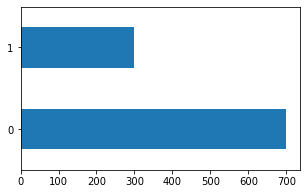

In [33]:

# check the distribution(bar plot) of those that default payment or not



import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 3))
df['default'].value_counts().plot(kind = 'barh')

In [34]:
# check missing values
df['default'].isnull().sum()

0

In [35]:
# Print datatypes

df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

/var/folders/6p/x7ym9x0j05x3j0tbqgmrkkjh0000gp/T/ipykernel_13734/710498048.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


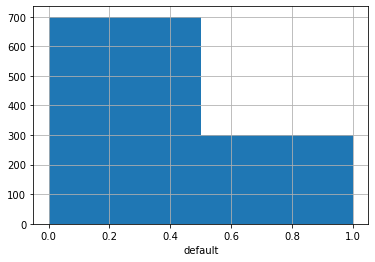

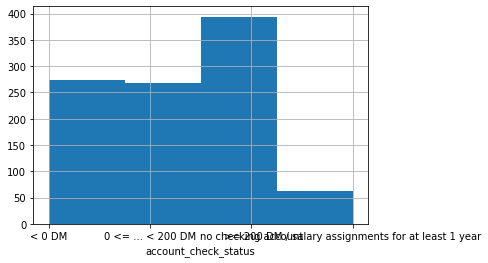

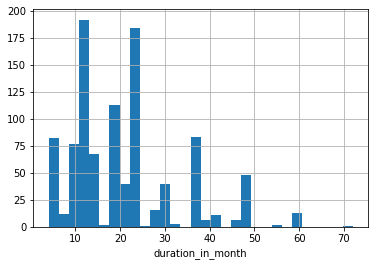

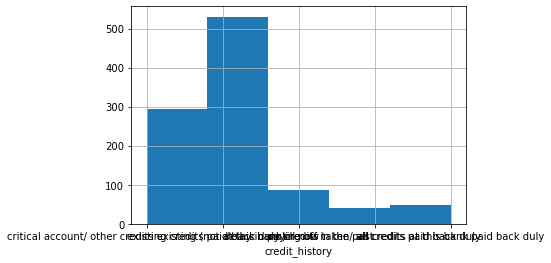

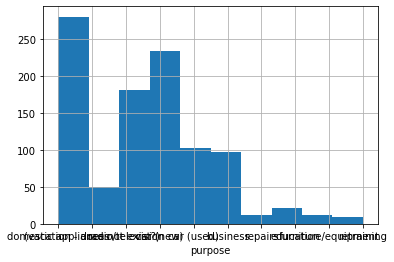

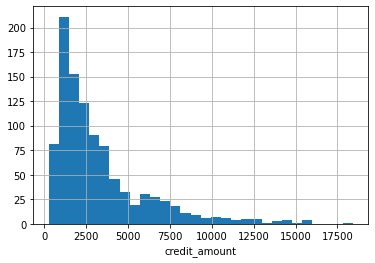

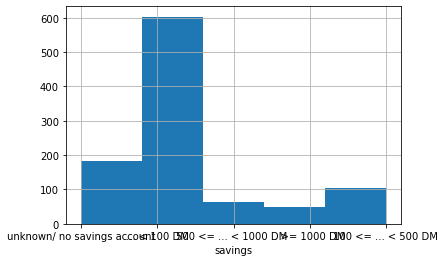

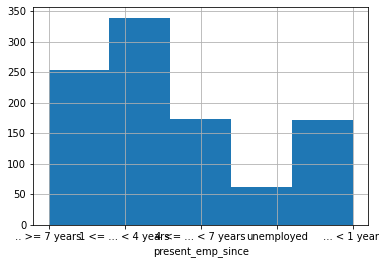

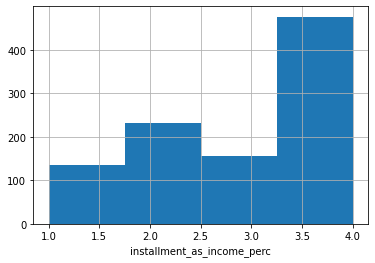

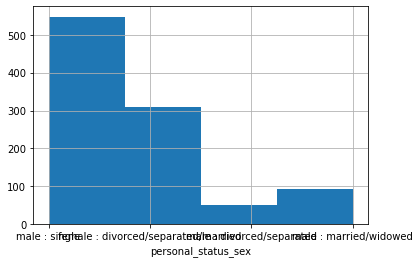

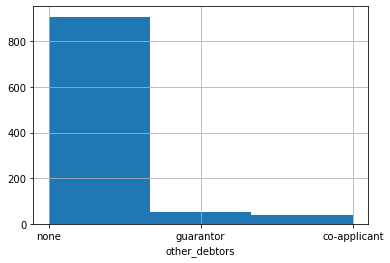

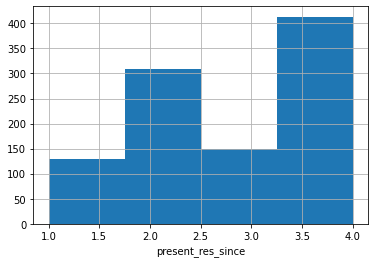

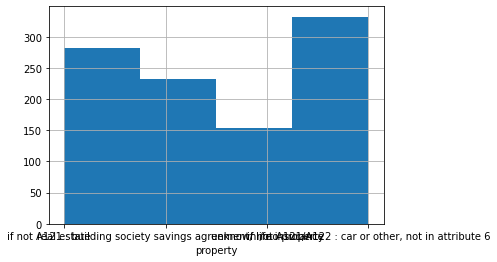

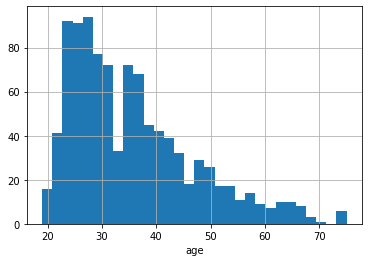

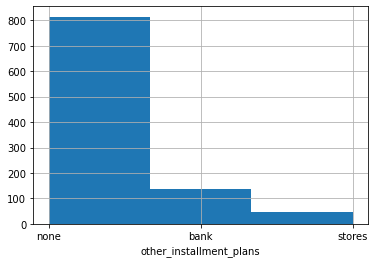

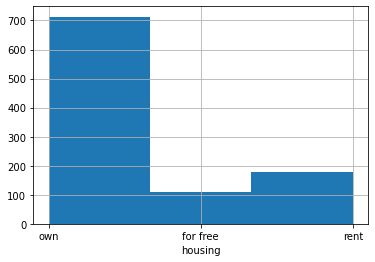

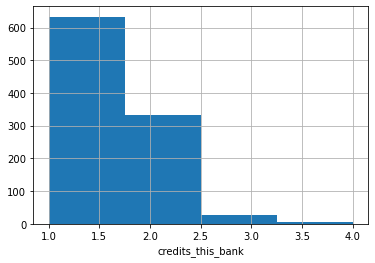

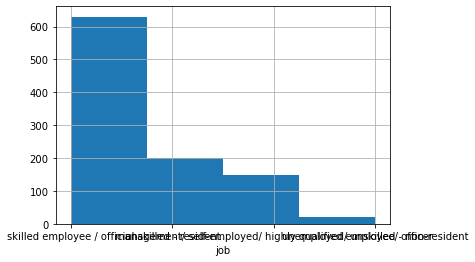

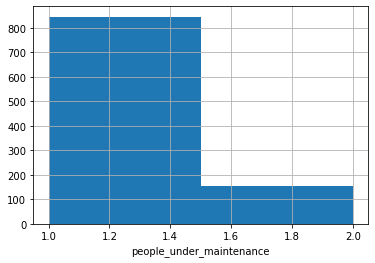

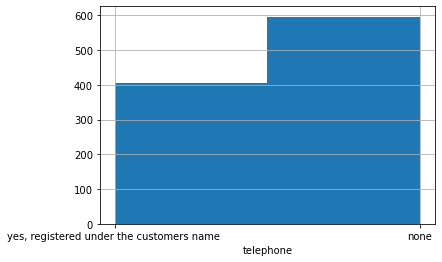

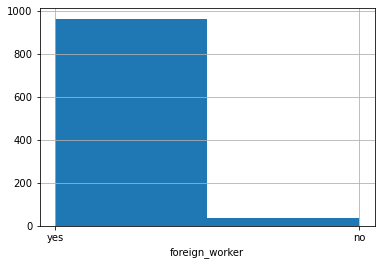

In [36]:

# Print the distibutions for each variable in the data set

for f in df.columns:
    try:
        fig = plt.figure()
        num_bins = min((30, len(df[f].unique())))
        df[f].hist(bins=num_bins)
        plt.xlabel(f)
    except TypeError:
        print()
        print(df[f].value_counts())
        print('-'*30)
        plt.close()

# How many NaNs?

In [38]:


df.isnull().sum() / len(df) * 100

default                       0.0
account_check_status          0.0
duration_in_month             0.0
credit_history                0.0
purpose                       0.0
credit_amount                 0.0
savings                       0.0
present_emp_since             0.0
installment_as_income_perc    0.0
personal_status_sex           0.0
other_debtors                 0.0
present_res_since             0.0
property                      0.0
age                           0.0
other_installment_plans       0.0
housing                       0.0
credits_this_bank             0.0
job                           0.0
people_under_maintenance      0.0
telephone                     0.0
foreign_worker                0.0
dtype: float64


# Fill time_spend_company

fill_value = df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(fill_value)

# How does age vary for defaulters= or not- use boxplots here




In [42]:
df.foreign_worker = df.foreign_worker.map({'no': 0, 'yes': 1})


In [43]:
df

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,1
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,1
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,1
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,1
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",1
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,1
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",1


In [45]:
df1 = pd.get_dummies(df)
df1

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,foreign_worker,account_check_status_0 <= ... < 200 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name"
0,0,6,1169,4,4,67,2,1,1,0,...,0,0,1,0,0,1,0,0,0,1
1,1,48,5951,2,2,22,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
2,0,12,2096,2,3,49,1,2,1,0,...,0,0,1,0,0,0,0,1,1,0
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,0,1,0,0,1,0
4,1,24,4870,3,4,53,2,2,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,1736,3,4,31,1,1,1,0,...,0,0,1,0,0,0,0,1,1,0
996,0,30,3857,4,4,40,1,1,1,0,...,0,0,1,0,1,0,0,0,0,1
997,0,12,804,4,4,38,1,1,1,0,...,0,0,1,0,0,1,0,0,1,0
998,1,45,1845,4,4,23,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
# for this classification, we will be investigating to continuous features

# age, credit_amount and the outcome is default

In [46]:
# plot a hisytogram to assess the distriobution of the cont var
# plot each cont variable spilt by the target variable


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,1
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,1
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,1
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,1
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",1
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,1
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",1


# Split the data into training and testing sets

In [50]:



from sklearn.model_selection import train_test_split

features = ['age', 'credit_amount']

X_train, X_test, y_train, y_test = train_test_split(df[features].values, 
                 df['default'].values,test_size=0.3, random_state=1)

In [ ]:
# SVM and KKN are the most effectiove when inpute data are scaled

# SVM
Support vector machines (SVMs) are useful when there are very many input 
variables or when input variables interact with the outcome or with each other
in complicated (nonlinear) ways. SVMs make fewer assump- tions about variable distribution 
than do many other methods, which makes them especially useful when the training data isn’t 
completely representative of the way the data is distributed in production.

The performance of linear regression can suffer when there is a non- linear relationship between the predictors and the outcome. In that case, we consider enlarging the feature space using functions of the predictors,
such as quadratic and cubic terms, in order to address this non-linearity. In the case of the support vector classifier, we could address the prob- lem of possibly non-linear boundaries between classes in a similar way, by enlarging the feature space using quadratic, cubic, and even higher-order polynomial functions of the predictors


In [51]:

# Scale the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler
#load scaler
scaler = StandardScaler()
# fit scaler only on the training data set and not the whole data set i.e scalling the data set before splitting it into the training and test set is a mistake
# we dont want this because the model  training should not be influenced in any wasy by the test set
#fit and transform training set
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [52]:

# Train a support vector machine classifier

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train) # n.b only the x_train has been scaled

SVC(C=1, kernel='linear', random_state=1)

In [53]:
# What is the classification accuracy? compute the accuracy on unseen data

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std) # n.b test set data here
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 71.3%


In [ ]:
# accuracy of 71% - not bad, but recal that our target is imbalanced

In [54]:
# calculate the confusion matrix to determion accuracy within each class predidiction

from sklearn.metrics import confusion_matrix

print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print('default = 0 : {:.2f}%'.format(scores[0]))
print('default = 1 : {:.2f}%'.format(scores[1]))


percent accuracy score per class:
default = 0 : 100.00%
default = 1 : 0.00%


In [ ]:
# looks like model is classifying every sample as 0 which is clearly not helpful

In [60]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 3.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


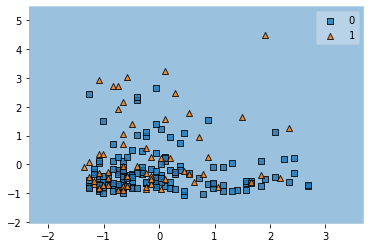

In [62]:

# Plot the resulting decision regions
from mlxtend.plotting import plot_decision_regions
N_samples = 200 # the function. plots decision regions along with a set of samples passed as argument
X, y = X_train_std[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm);


In [ ]:
# from above, every decision is entirely blue meaning it is classifing almost everything as 0
 # a bad job as the kernel we used was linear as specified above

In [63]:

# The docstring for scikit-learn's SVM

SVC?

# train svm by changing the kernel to rbf

In [65]:
# Train a support vector machine classifier

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, random_state=1)

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    # Print confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1)])
    indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1)])
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    # Print test-set accuracy grouped by the target variable 
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('default = 0 : {:.2f}%'.format(scores[0]))
    print('default = 1 : {:.2f}%'.format(scores[1]))
    print()
    
    # Plot decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    X, y = X_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(X, y, clf=clf)
    
    #plt.xlabel('satisfaction_level')
    #plt.ylabel('last_evaluation')
    plt.legend(loc='upper left')

total accuracy = 71.7%


predictions   
                   0  1
actual 0         211  3
       1          82  4


percent accuracy score per class:
default = 0 : 98.60%
default = 1 : 4.65%



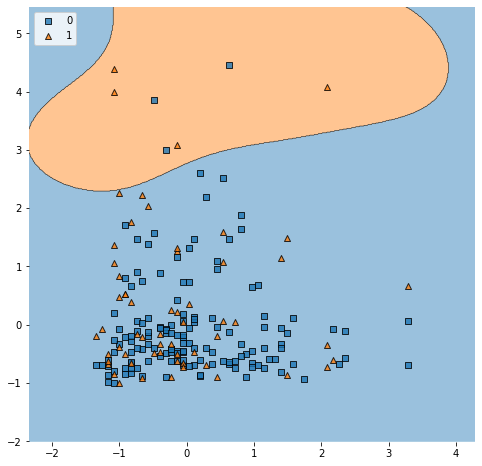

In [70]:
check_model_fit(svm, X_test_std, y_test)

# KNN CLASSIFICATION

total accuracy = 63.0%


predictions    
                   0   1
actual 0         162  52
       1          59  27


percent accuracy score per class:
default = 0 : 75.70%
default = 1 : 31.40%



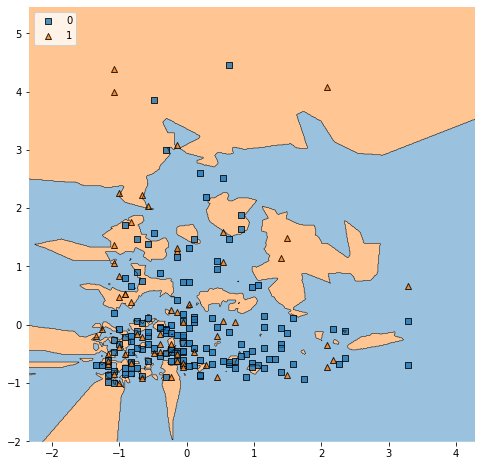

In [72]:

# Load the K-Nearest Neighbors class

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)

total accuracy = 71.7%


predictions   
                   0  1
actual 0         209  5
       1          80  6


percent accuracy score per class:
default = 0 : 97.66%
default = 1 : 6.98%



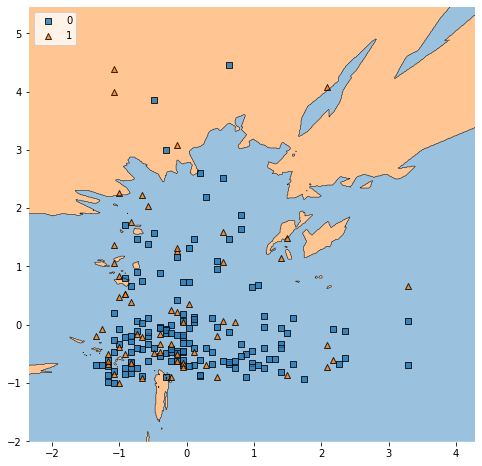

In [74]:


# Increase the number of "nearest neighbors" to reduce overfitting

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)

# RANDOM FOREST

total accuracy = 71.0%


predictions   
                   0  1
actual 0         206  8
       1          79  7


percent accuracy score per class:
default = 0 : 96.26%
default = 1 : 8.14%



(0.2, 1.2)

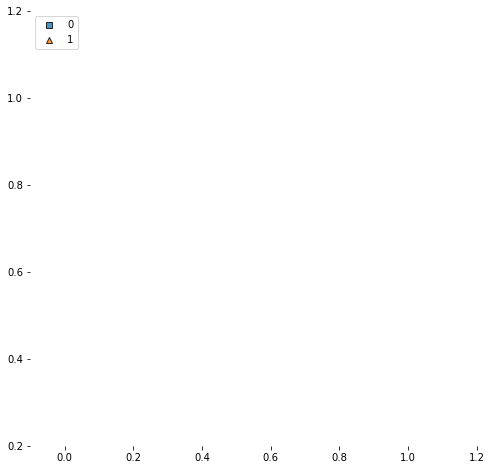

In [76]:
# Train a Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_depth=5,
                                random_state=1)
forest.fit(X_train, y_train)

check_model_fit(forest, X_test, y_test)
plt.xlim(-0.1, 1.2)
plt.ylim(0.2, 1.20)

In [79]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [82]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(
                forest.estimators_[0],
                out_file=None, 
                feature_names=features,  
                class_names=['no', 'yes'],  
                filled=True, rounded=True,  
                special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH